In [1]:
from scipy import stats

from numpy import log

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-5-17'

In [2]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [3]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> artigo
5 -> cities.csv
6 -> covid19_municipios.csv
7 -> COVID19_REGIOES BR.csv
8 -> Dados_demográficos_municípios.xlsx
9 -> Dados_demográficos_municípios_new.xlsx
10 -> Datalab_COVID.pptx
11 -> figures
12 -> idade.xlsx
13 -> obito_cartorio.csv
14 -> População residente municipal x população faixa etária.csv
15 -> População residente por estado - 2015.csv
16 -> População residente x sexo.csv
17 -> results


In [4]:
date = 3
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
77233,NaN,43.0,2020-05-13,20,11377239.0,False,True,2917,25.63891,2020-05-12,0.0381,111,65,state,RS,0,0
77234,NaN,42.0,2020-05-13,20,7164788.0,False,True,3733,52.10203,2020-05-12,0.0196,73,63,state,SC,0,0
77235,NaN,28.0,2020-05-13,20,2298696.0,False,True,2032,88.39794,2020-05-12,0.0182,37,61,state,SE,0,0
77236,NaN,35.0,2020-05-13,20,45919049.0,True,False,51097,111.27626,2020-05-13,0.0806,4118,79,state,SP,3378,169
77237,NaN,17.0,2020-05-13,20,1572866.0,False,True,828,52.64276,2020-05-11,0.0169,14,57,state,TO,0,0


In [5]:
# df_cov = df_cov[(df_cov['last_available_date'] == '2020-04-10') & (df_cov['place_type'] == 'city')][[
#     "estimated_population_2019",
#     "last_available_confirmed",
#     "last_available_deaths",
#     "last_available_confirmed_per_100k_inhabitants",
#     "last_available_death_rate",
#     "city",
#     "last_available_date"
# ]]
# df_cov = df_cov.rename(columns={
#     "estimated_population_2019": "Population",
#     "last_available_confirmed": "Confirmed",
#     "last_available_deaths": "Deaths",
#     "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
#     "last_available_death_rate": "Death Rate",
#     "city": "City",
#     "last_available_date": "Date"
# })
# df_cov.index.name = 'Date'
# df_cov.head()

In [6]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77238 entries, 0 to 77237
Data columns (total 17 columns):
city                                             75560 non-null object
city_ibge_code                                   76416 non-null float64
date                                             77238 non-null object
epidemiological_week                             77238 non-null int64
estimated_population_2019                        76416 non-null float64
is_last                                          77238 non-null bool
is_repeated                                      77238 non-null bool
last_available_confirmed                         77238 non-null int64
last_available_confirmed_per_100k_inhabitants    74744 non-null float64
last_available_date                              77238 non-null object
last_available_death_rate                        77238 non-null float64
last_available_deaths                            77238 non-null int64
order_for_place                           

In [7]:
teste = 'date'
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', teste]]
df_cov[teste] = pd.to_datetime(df_cov[teste])
group = df_cov.groupby(teste)
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']
df['Deaths'] = group.sum()['last_available_deaths']
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-02-25,2,0,0.01034
2020-02-26,2,0,0.01034
2020-02-27,2,0,0.01034
2020-02-28,4,0,0.02068
2020-02-29,4,0,0.02068


In [8]:
df.tail()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-05-09,314480,21392,129601.54233
2020-05-10,326956,22346,136072.05287
2020-05-11,339376,23315,145413.72071
2020-05-12,355660,24773,155698.27541
2020-05-13,362844,25131,157765.30995


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 2020-02-25 to 2020-05-13
Data columns (total 3 columns):
Confirmed         79 non-null int64
Deaths            79 non-null int64
Confirmed/100k    79 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [10]:
g = 1
campo = 'Confirmed'
print_campo = 's'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [11]:
df = pd.DataFrame(df[campo])

# Augmented Dickey Fuller test
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.660079
p-value: 0.451789


In [12]:

# Adf Test
print(ndiffs(df, test='adf'))

# KPSS test
print(ndiffs(df, test='kpss'))

# PP test:
print(ndiffs(df, test='pp'))

2
2
2


C:\Users\gfsil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


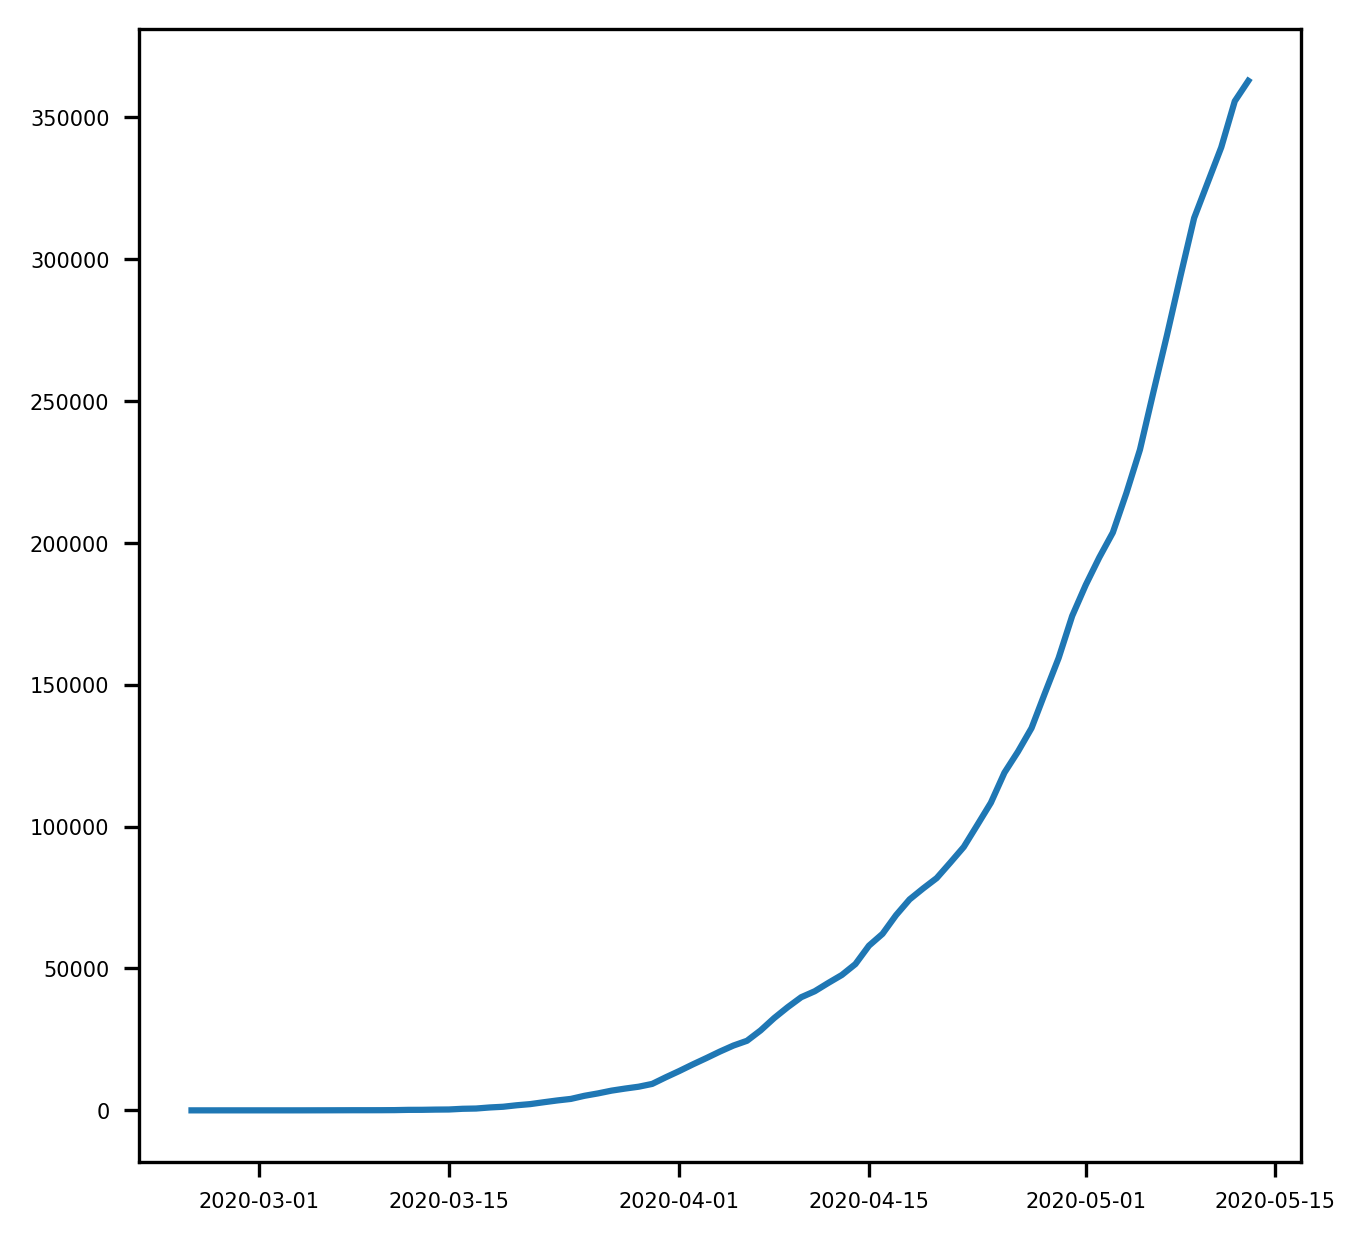

In [13]:
plt.figure(figsize=(5,5))
plt.plot(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

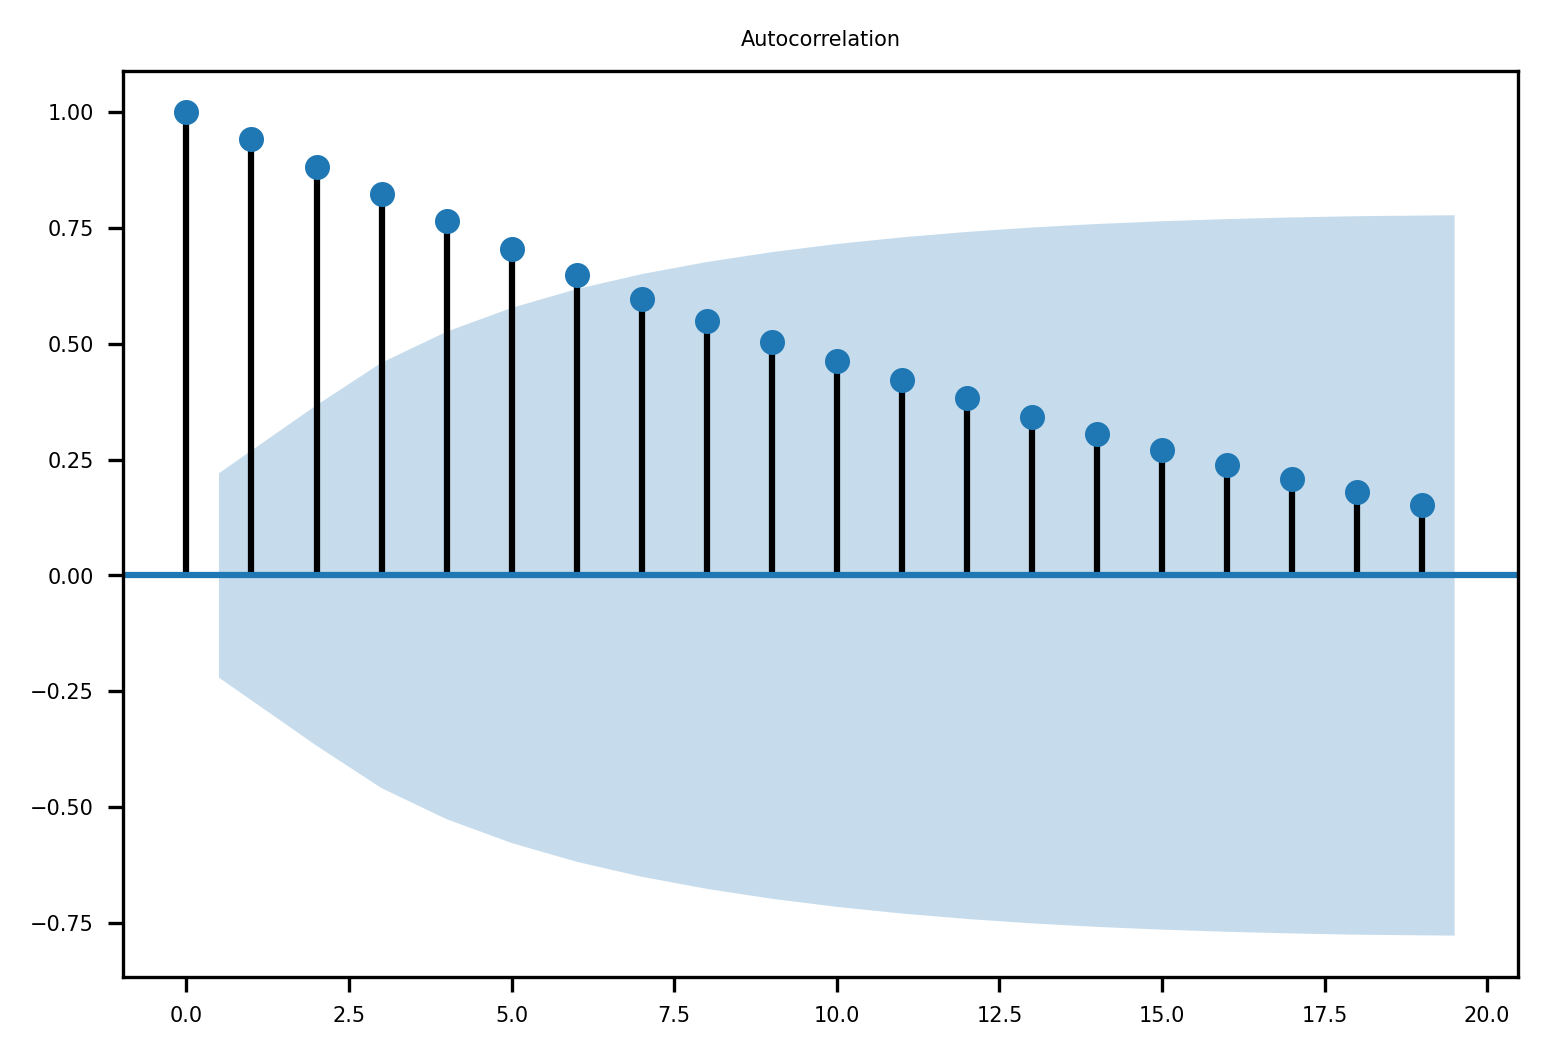

In [14]:
plt.figure(figsize=(5,2))
plot_acf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

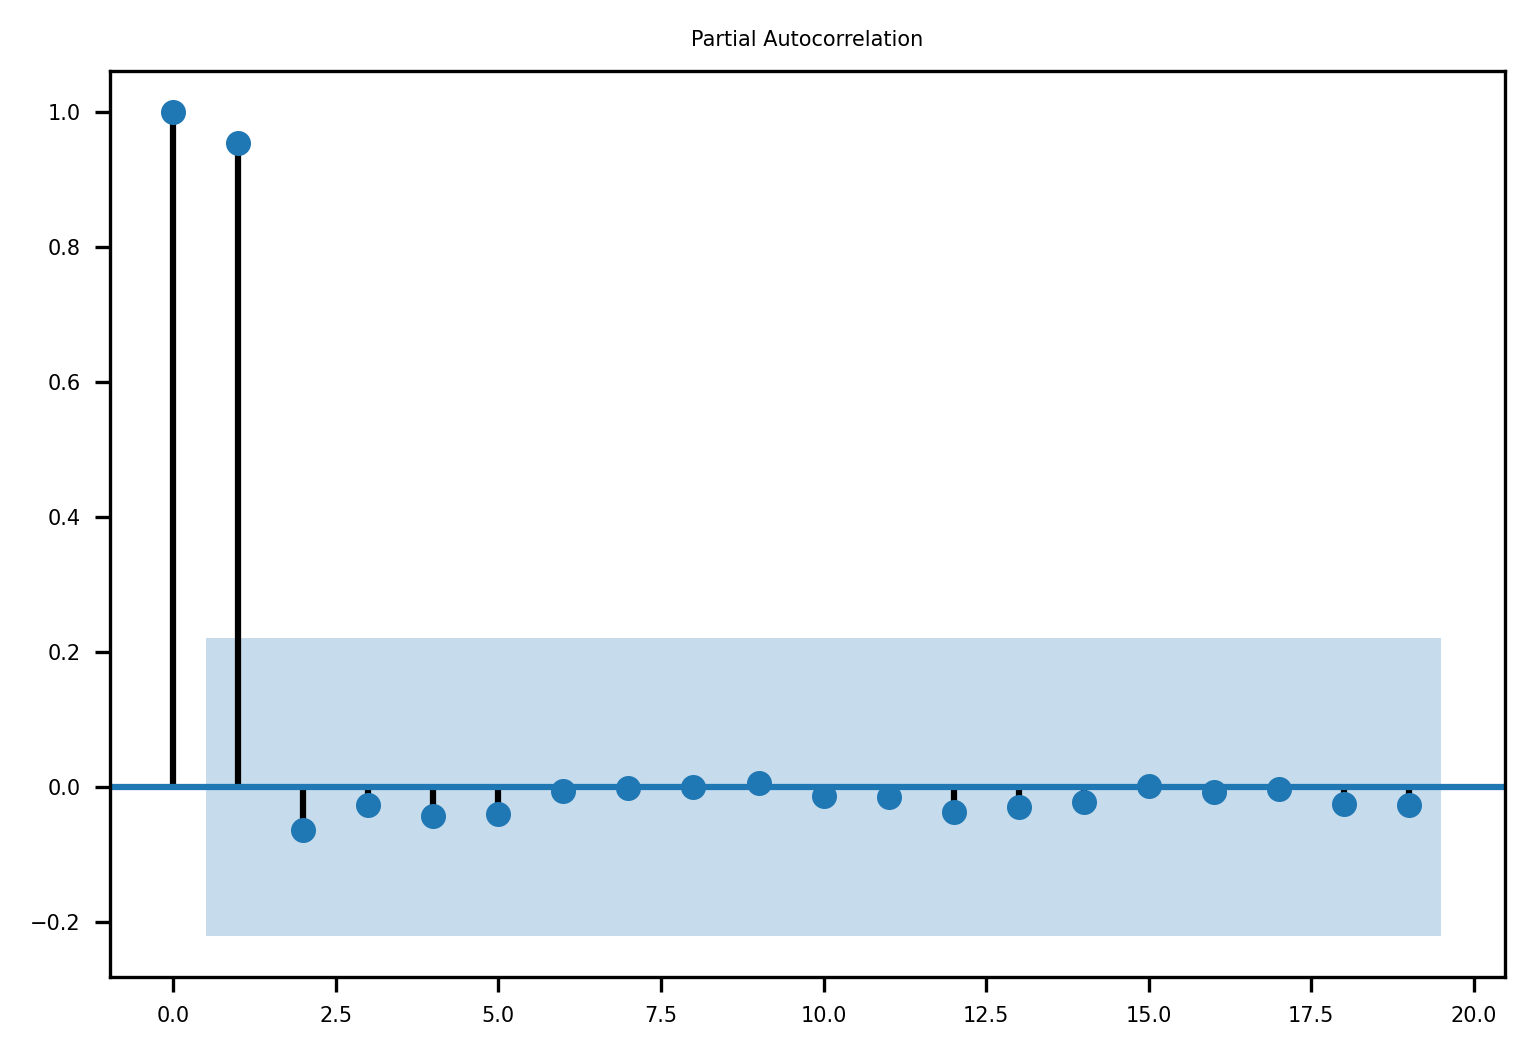

In [15]:
plt.figure(figsize=(5,2))
plot_pacf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

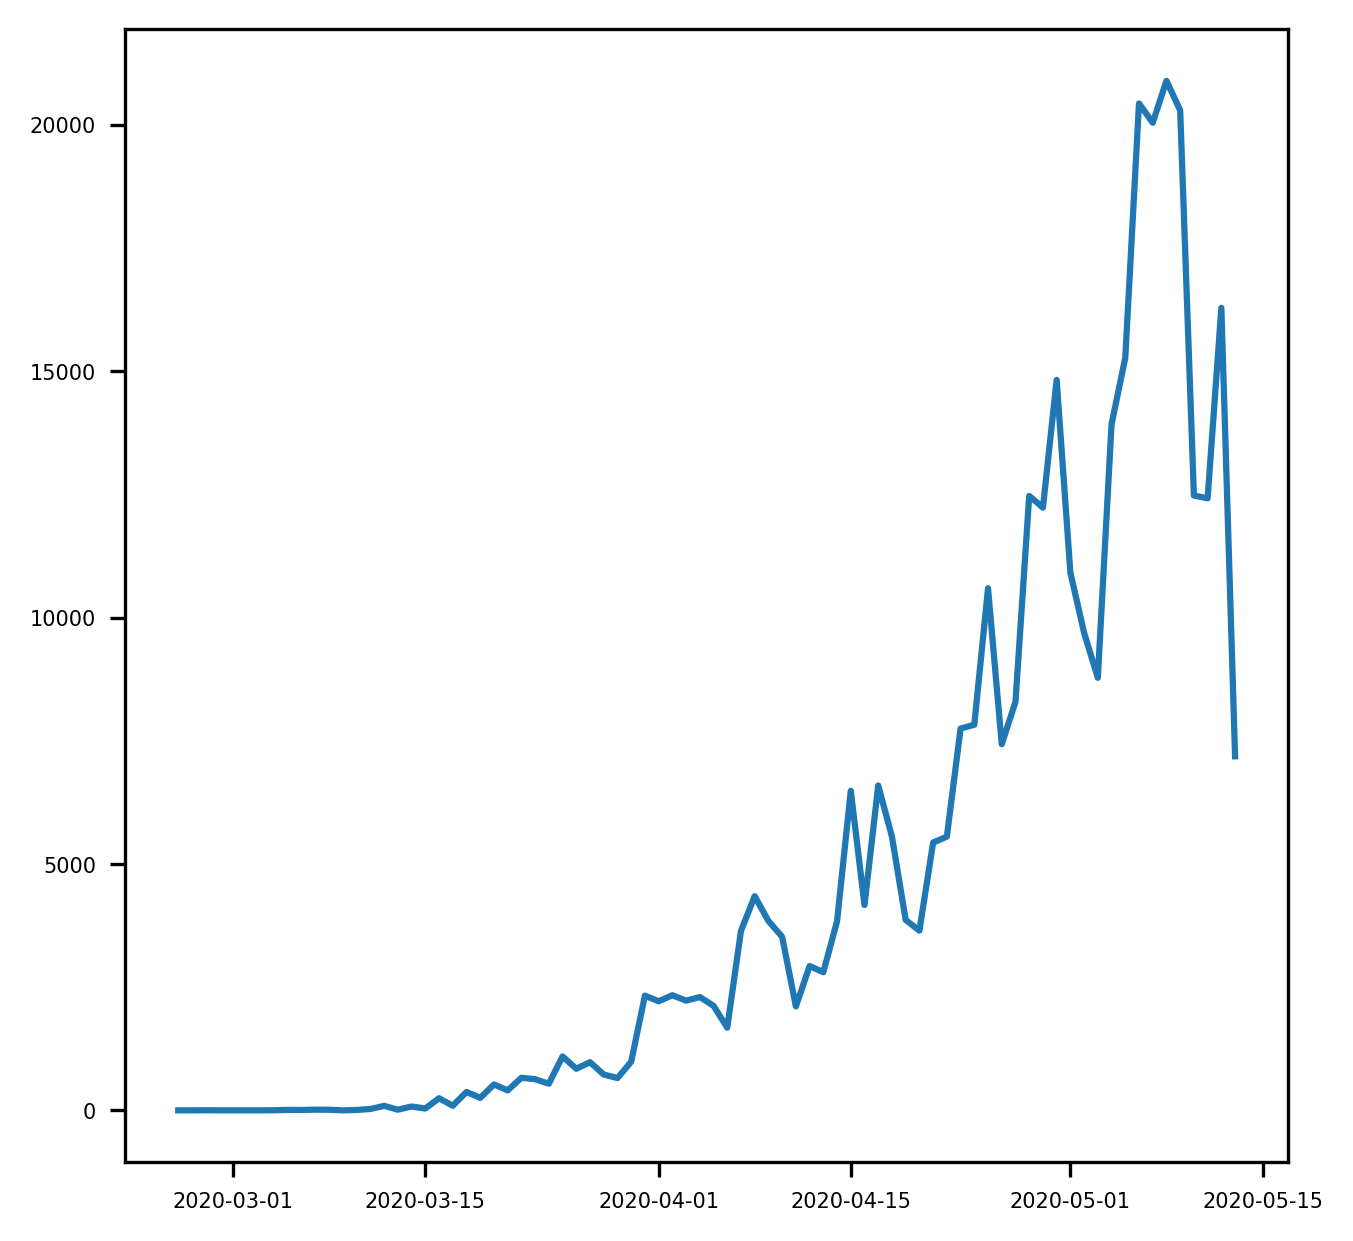

In [16]:
plt.figure(figsize=(5,5))
plt.plot(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

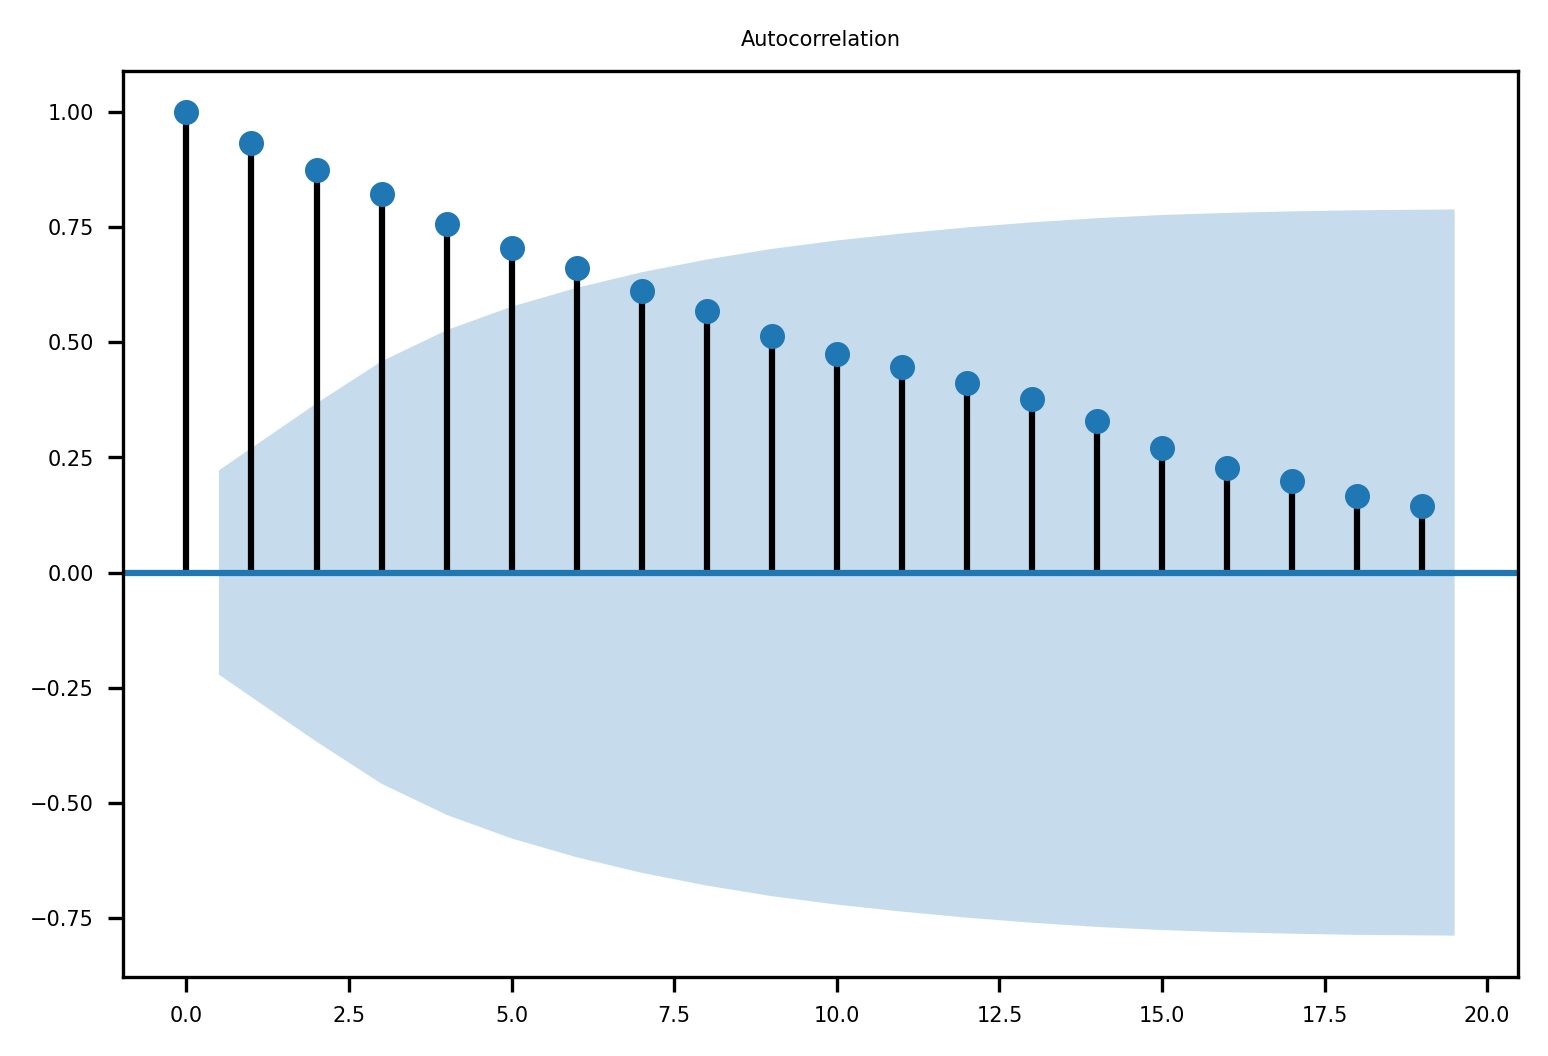

In [17]:
plt.figure(figsize=(5,2))
plot_acf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

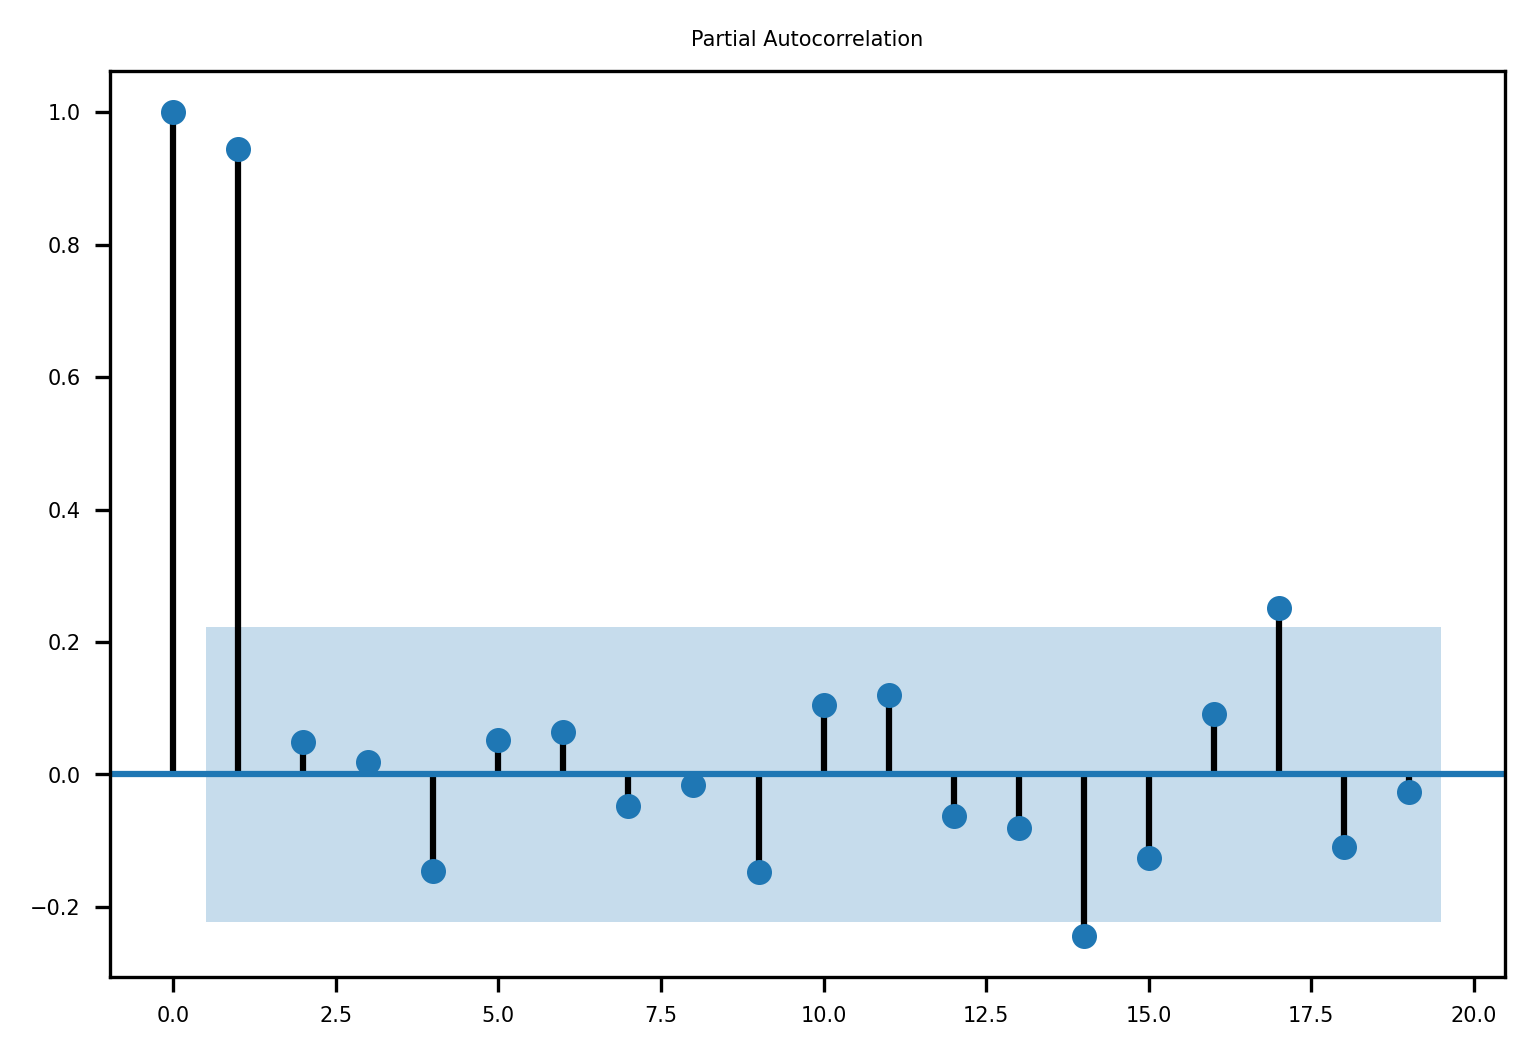

In [18]:
plt.figure(figsize=(5,2))
plot_pacf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

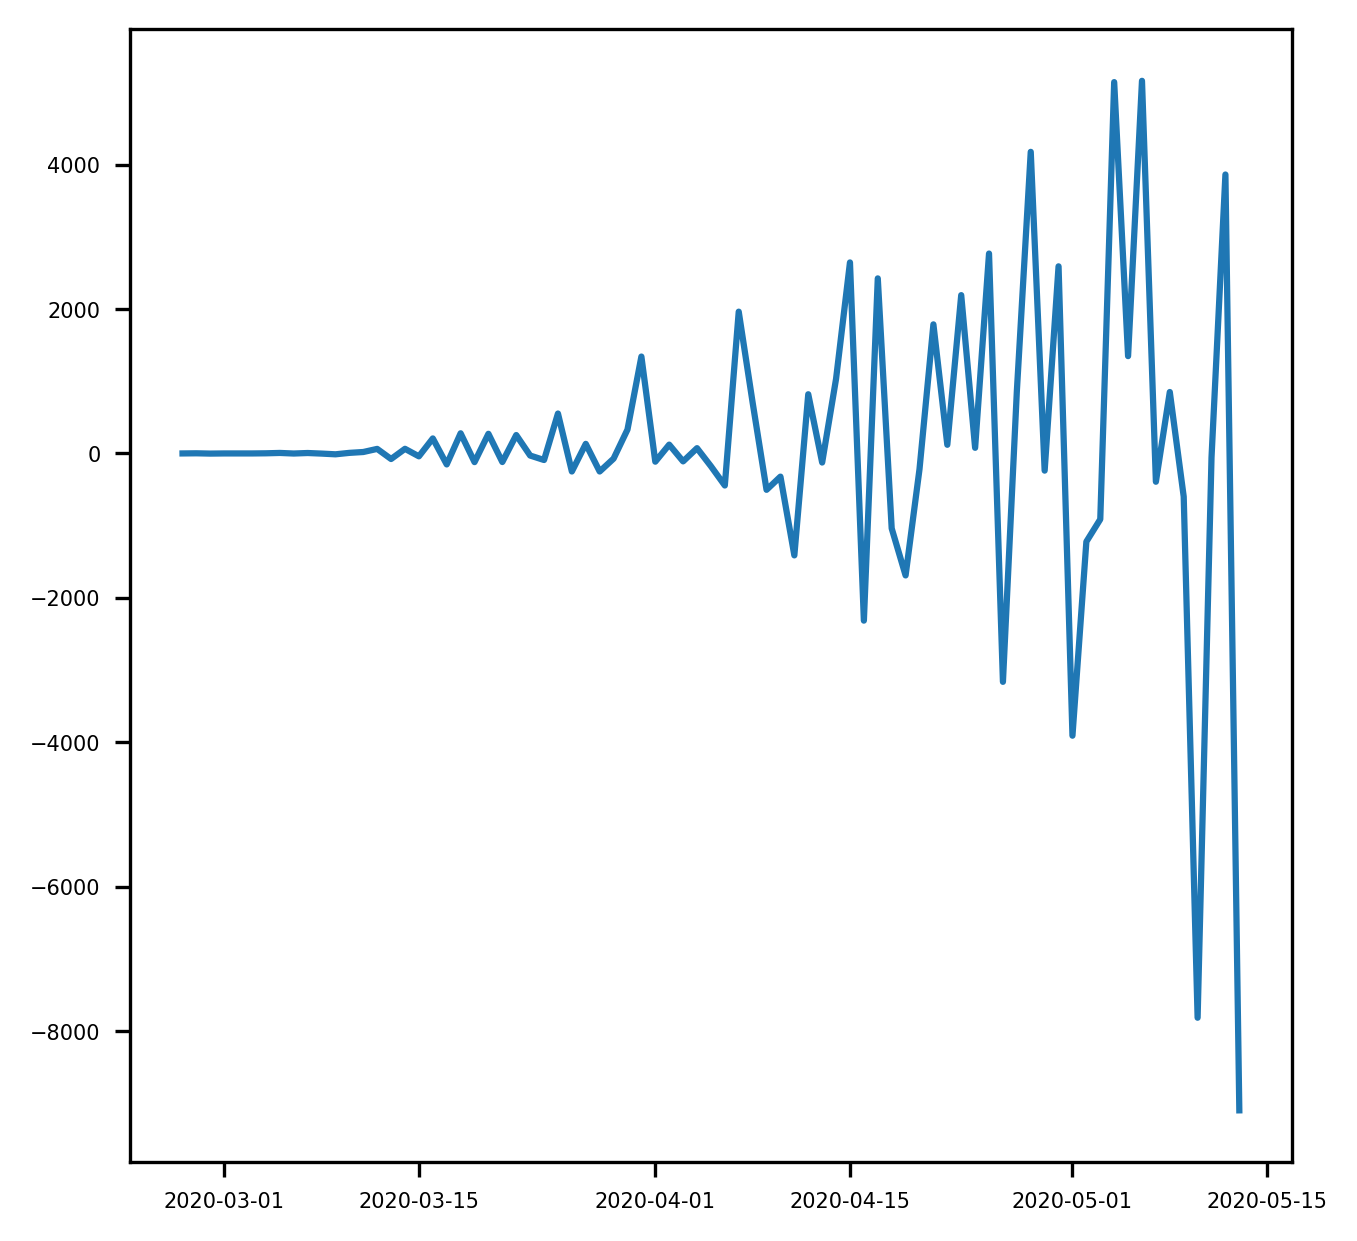

In [19]:
plt.figure(figsize=(5,5))
plt.plot(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

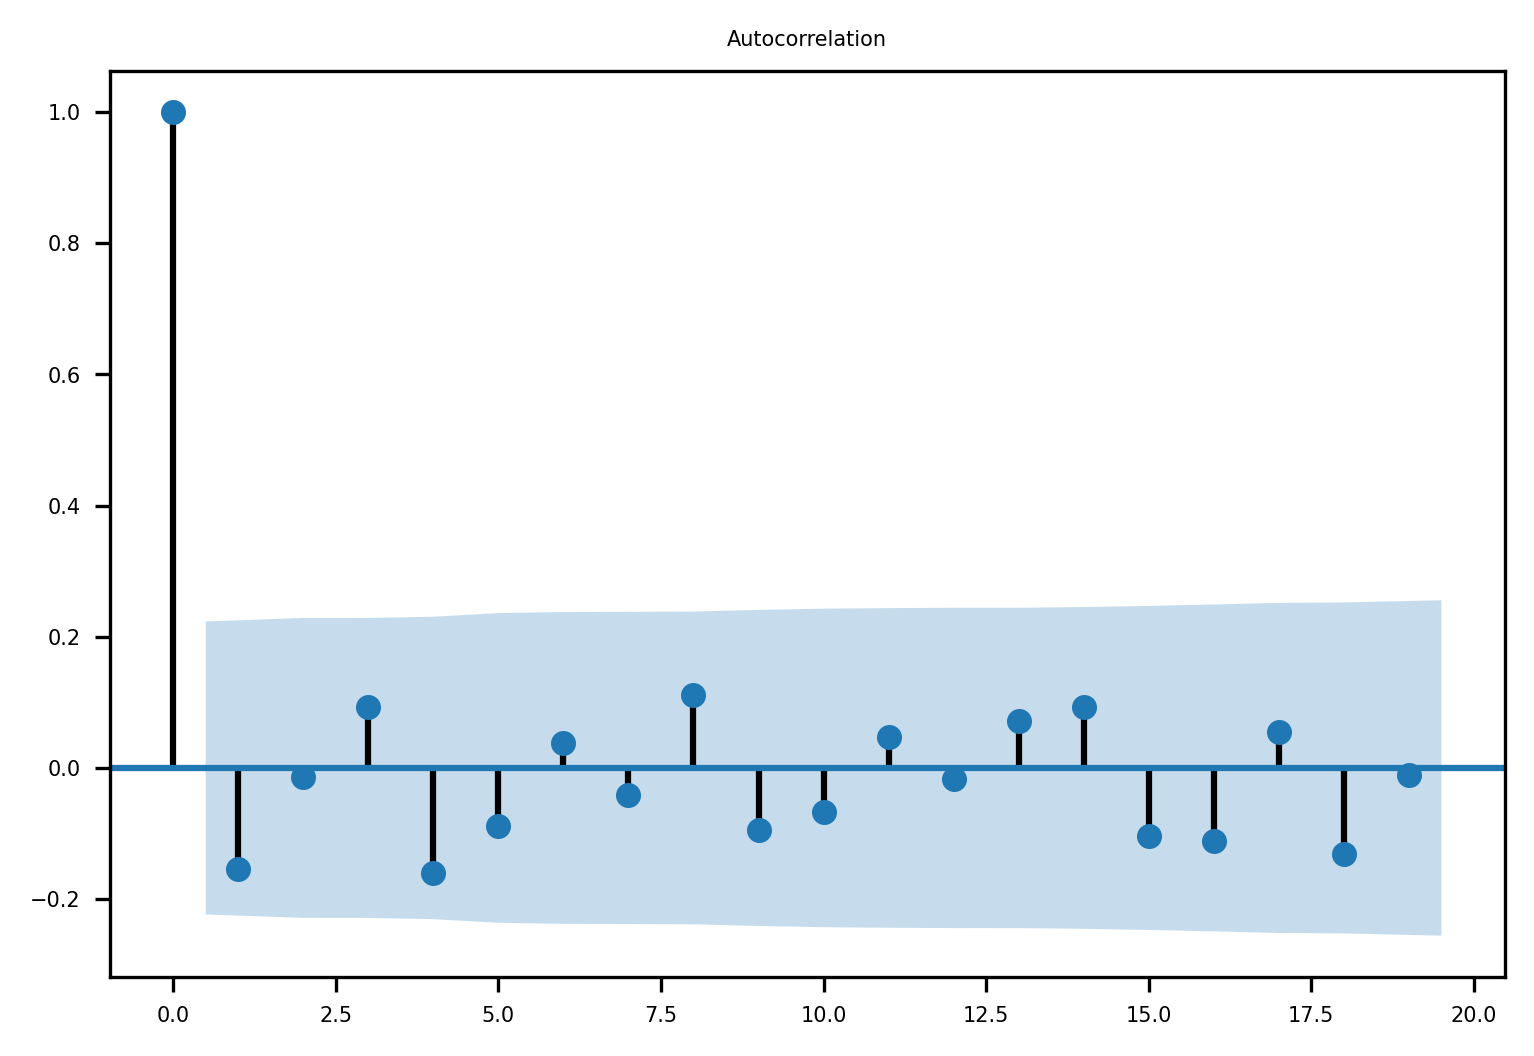

In [20]:
plt.figure(figsize=(5,2))
plot_acf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

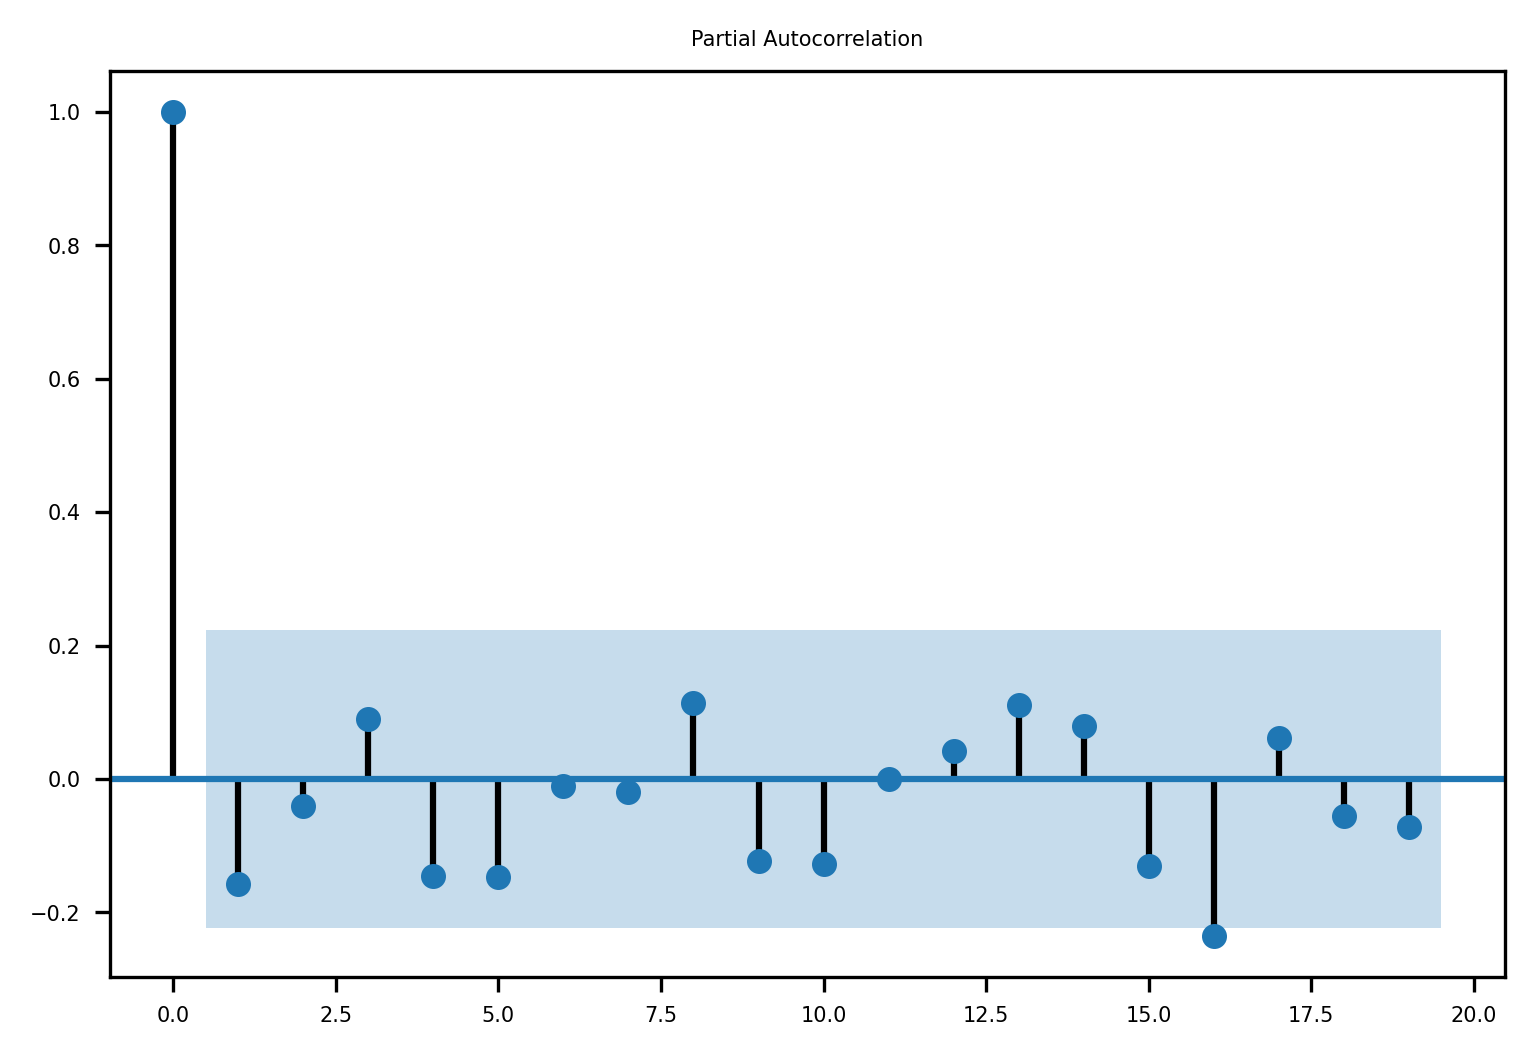

In [21]:
plt.figure(figsize=(5,2))
plot_pacf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [22]:
fonte = 20
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

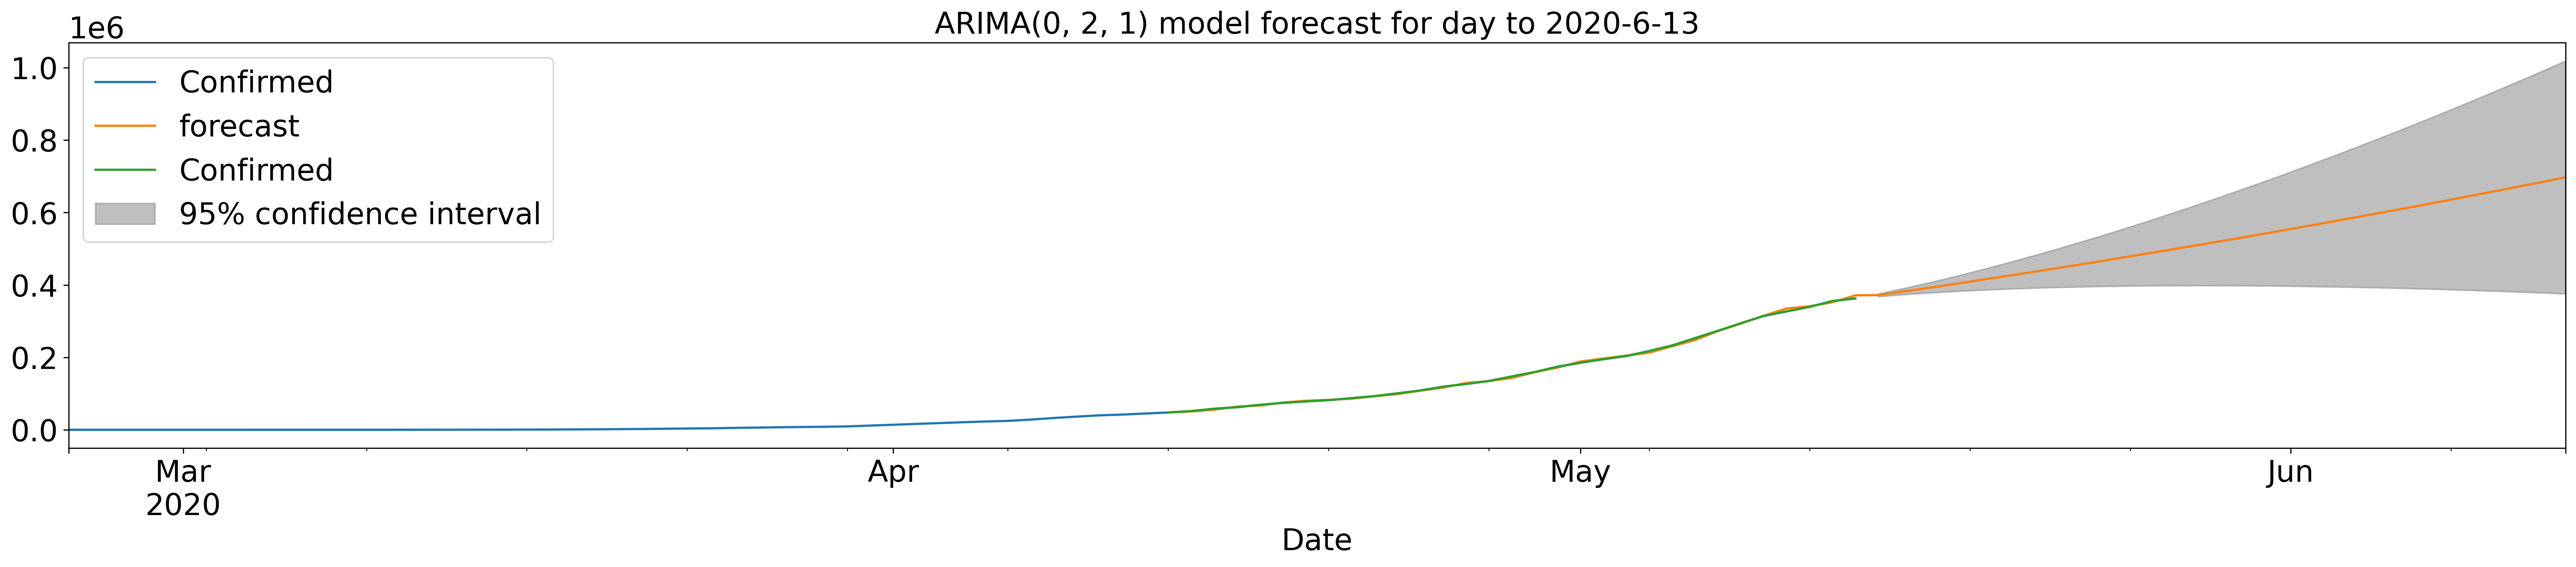

In [23]:
p = 0
d = 2
q = 1
test = (p,d,q) #paramentros guardados em uma variável
modelo = ARIMA(df[campo], order=test, freq='D') #parametros para o modelo preditivo
results = modelo.fit() #ajuste de modelo
plt.figure(figsize=figsize) #plotando imagem
results.plot_predict(
   first, last,               #plotando a primeira e ultima data?
    ax = df[campo].plot(), #filtrando e usando apenas a coluna 'confirmed'
    plot_insample=True,
)
plt.title('ARIMA'+str(test)+' model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   77
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -694.290
Method:                       css-mle   S.D. of innovations           1993.286
Date:                Sun, 17 May 2020   AIC                           1394.580
Time:                        12:26:23   BIC                           1401.611
Sample:                    02-27-2020   HQIC                          1397.392
                         - 05-13-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                116.4340    181.988      0.640      0.522    -240.255     473.123
ma.L1.D2.Confirmed    -0.2036      0.124     -1.640      0.101      -0.447       0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.9114           +0.0000j            4.9114            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
pred = results.forecast(steps=30)
pred

(array([371880.89145249, 381034.21694683, 390303.97648302, 399690.17006107,
        409192.79768096, 418811.85934272, 428547.35504632, 438399.28479178,
        448367.64857909, 458452.44640825, 468653.67827927, 478971.34419213,
        489405.44414685, 499955.97814343, 510622.94618185, 521406.34826213,
        532306.18438427, 543322.45454825, 554455.15875409, 565704.29700178,
        577069.86929132, 588551.87562272, 600150.31599597, 611865.19041107,
        623696.49886803, 635644.24136683, 647708.41790749, 659889.02849001,
        672186.07311437, 684599.55178059]),
 array([  1993.28554055,   4098.14115148,   6595.80421027,   9441.54205206,
         12599.56041082,  16042.54231976,  19749.05955113,  23701.80166127,
         27886.43438693,  32290.8458833 ,  36904.63154326,  41718.73008012,
         46725.15886059,  51916.81649253,  57287.3323191 ,  62830.94947025,
         68542.43246507,  74416.99313431,  80450.23045541,  86638.08111902,
         92976.77848984,  99462.81821689, 10

In [26]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

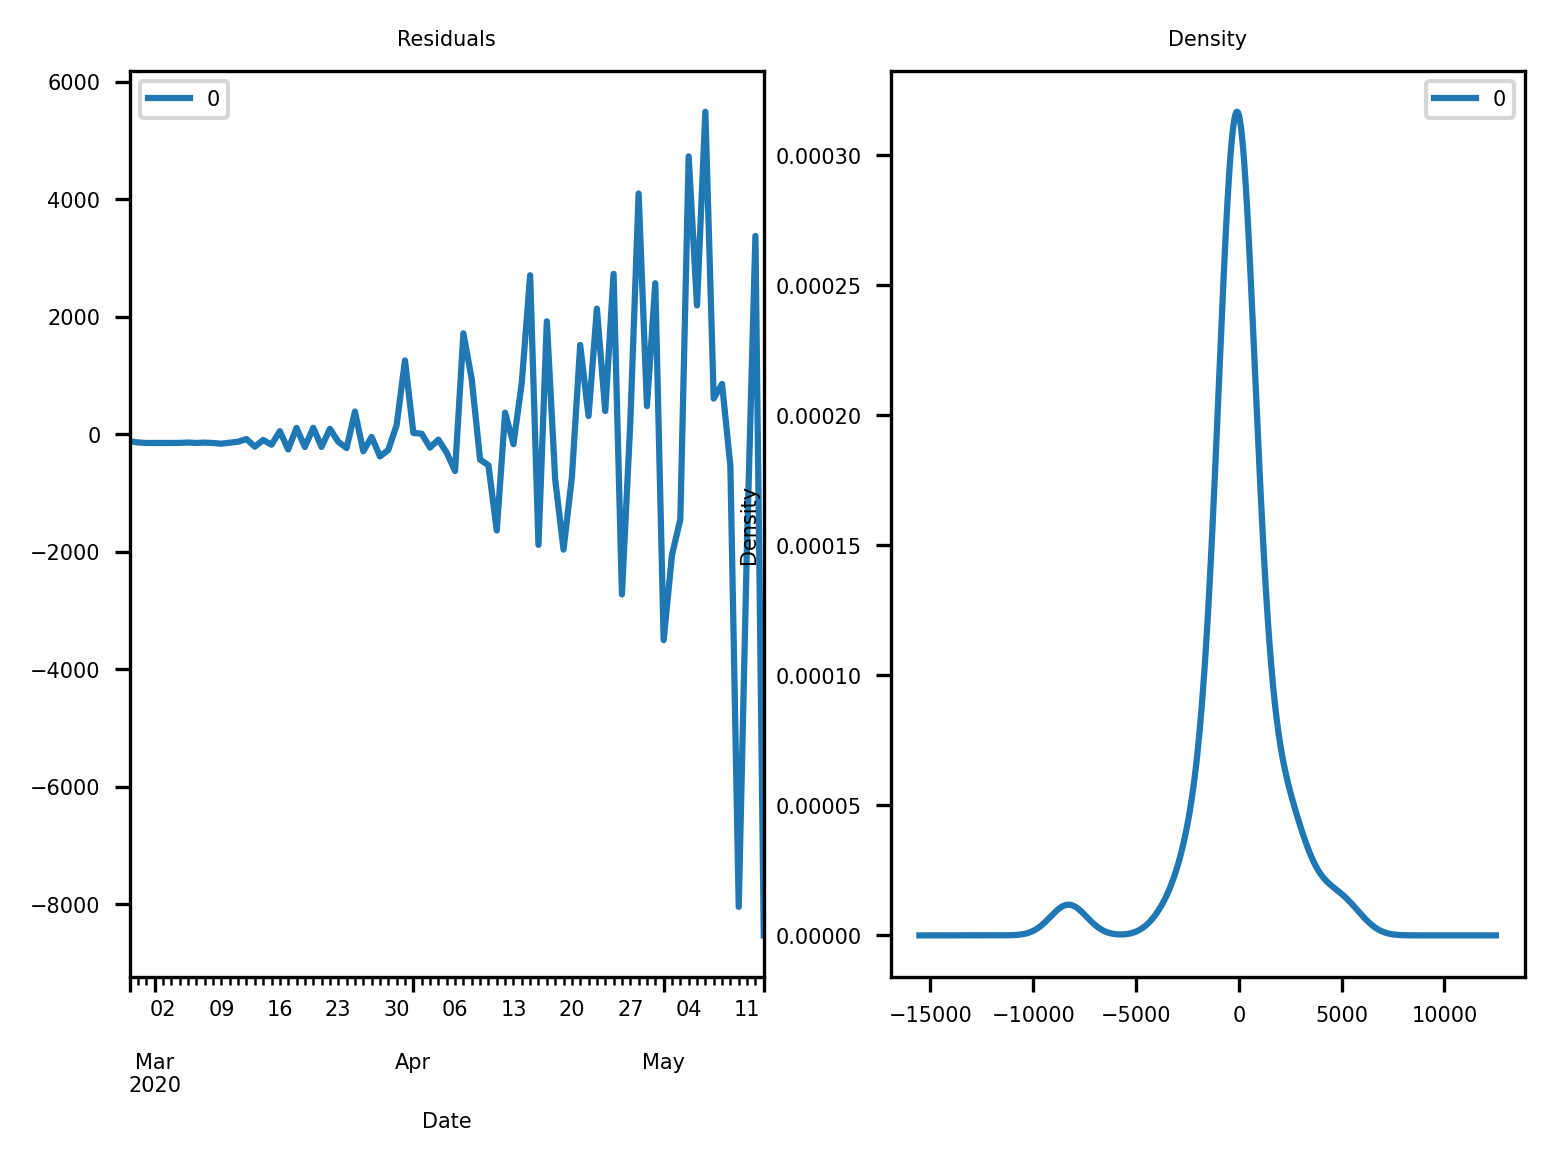

<Figure size 300x600 with 0 Axes>

In [27]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, )
plt.figure(figsize=(1,2))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

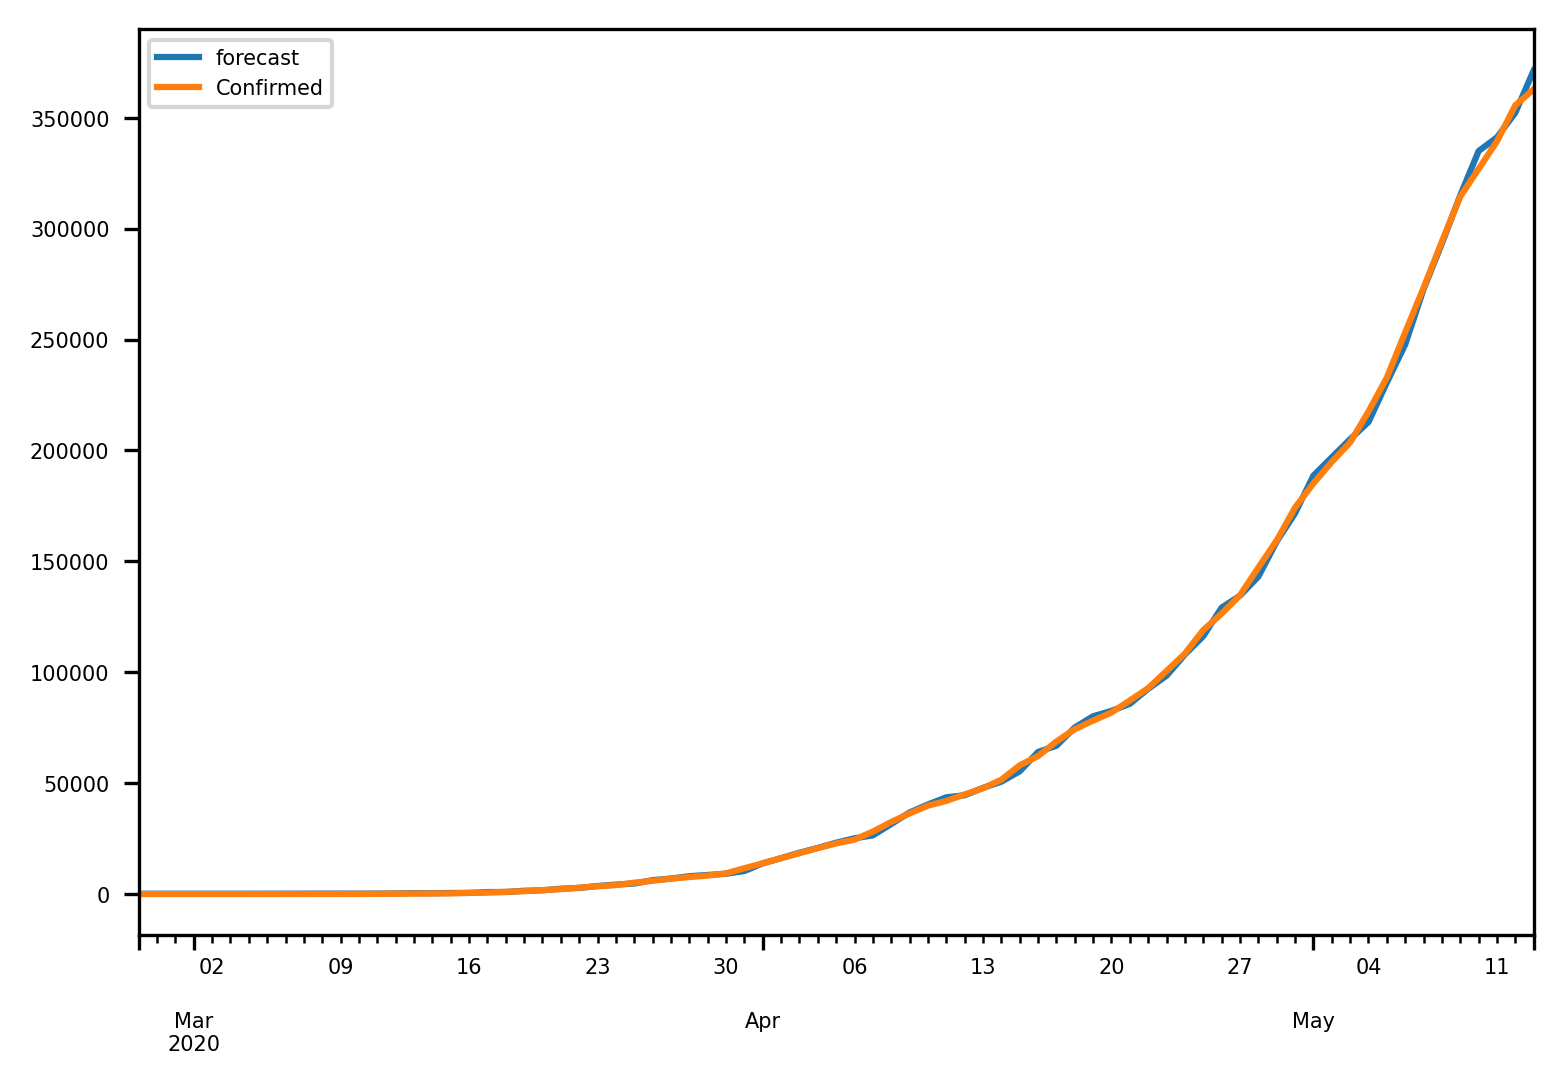

In [28]:
results.plot_predict(dynamic=False)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [29]:
fc, se, conf = results.forecast(79, alpha=0.05)
fc

array([ 371880.89145249,  381034.21694683,  390303.97648302,
        399690.17006107,  409192.79768096,  418811.85934272,
        428547.35504632,  438399.28479178,  448367.64857909,
        458452.44640825,  468653.67827927,  478971.34419213,
        489405.44414685,  499955.97814343,  510622.94618185,
        521406.34826213,  532306.18438427,  543322.45454825,
        554455.15875409,  565704.29700178,  577069.86929132,
        588551.87562272,  600150.31599597,  611865.19041107,
        623696.49886803,  635644.24136683,  647708.41790749,
        659889.02849001,  672186.07311437,  684599.55178059,
        697129.46448866,  709775.81123859,  722538.59203037,
        735417.806864  ,  748413.45573948,  761525.53865681,
        774754.055616  ,  788099.00661704,  801560.39165994,
        815138.21074468,  828832.46387128,  842643.15103974,
        856570.27225004,  870613.8275022 ,  884773.81679621,
        899050.24013208,  913443.09750979,  927952.38892936,
        942578.11439078,

In [30]:
from statsmodels.tsa.stattools import acf

In [31]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, df['Confirmed'])


C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 16259.527893102259,
 'me': 772732.5679555299,
 'mae': 772732.5679555299,
 'mpe': 16259.527893102259,
 'rmse': 805287.4053602241,
 'acf1': 0.9618348879404399,
 'corr': 0.8896916229026155,
 'minmax': 0.939672905078553}

In [32]:
model = pm.auto_arima(df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1395.101, BIC=1399.788, Time=0.010 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1394.549, BIC=1401.580, Time=0.011 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1394.547, BIC=1401.578, Time=0.052 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1393.264, BIC=1395.607, Time=0.000 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1396.622, BIC=1405.997, Time=0.044 seconds
Total fit time: 0.124 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -695.632
Date:                Sun, 17 May 2020   AIC                           1393.264
Time:                        12:26:25   BIC                           1395.607
Sample:                             0   H

In [33]:
smodel = pm.auto_arima(df, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=30,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 1, 1, 30) (constant=True); AIC=930.447, BIC=936.060, Time=1.480 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 30) (constant=True); AIC=952.458, BIC=956.200, Time=0.033 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 30) (constant=True); AIC=892.736, BIC=900.220, Time=0.418 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 30) (constant=True); AIC=906.541, BIC=914.026, Time=3.115 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 30); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 30) (constant=False); AIC=1000.936, BIC=1002.807, Time=0.055 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 30) (constant=True); AIC=890.766, BIC=896.379, Time=0.063 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 1, 30) (constant=True); AIC=892.716, BIC=900.201, Time=0.439 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 1, 30) (constant=True); AIC=894.716, BIC=904.072, Time=0.733 seconds
Fit ARIMA: (2, 1, 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 30)   Log Likelihood                -442.383
Date:                            Sun, 17 May 2020   AIC                            890.766
Time:                                    12:26:32   BIC                            896.379
Sample:                                         0   HQIC                           892.887
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1091.9283   1009.147      1.082      0.279    -885.964    3069.820
ar.L1          0.8424      0.087      9.683      0.000       0.672       1.013
sigma2      6.025e+06      0.448   1.35e+07      0.000    6.03e+06    6.03e+06
===================================================================================
Ljung-Box (Q):                       22.06   Jarque-Bera (JB):                10.24
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):              14.88   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
sxmodel = pm.auto_arima(df, 
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 1, 1, 30) (constant=True); AIC=930.447, BIC=936.060, Time=1.517 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 30) (constant=True); AIC=952.458, BIC=956.200, Time=0.033 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 30) (constant=True); AIC=892.736, BIC=900.220, Time=0.457 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 30) (constant=True); AIC=906.541, BIC=914.026, Time=3.177 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 30); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 30) (constant=False); AIC=1000.936, BIC=1002.807, Time=0.055 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 30) (constant=True); AIC=890.766, BIC=896.379, Time=0.063 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 1, 30) (constant=True); AIC=892.716, BIC=900.201, Time=0.438 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 1, 30) (constant=True); AIC=894.716, BIC=904.072, Time=0.709 seconds
Fit ARIMA: (2, 1, 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 30)   Log Likelihood                -442.383
Date:                            Sun, 17 May 2020   AIC                            890.766
Time:                                    12:26:39   BIC                            896.379
Sample:                                         0   HQIC                           892.887
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1091.9283   1009.147      1.082      0.279    -885.964    3069.820
ar.L1          0.8424      0.087      9.683      0.000       0.672       1.013
sigma2      6.025e+06      0.448   1.35e+07      0.000    6.03e+06    6.03e+06
===================================================================================
Ljung-Box (Q):                       22.06   Jarque-Bera (JB):                10.24
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):              14.88   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
y = df[campo]
param_list_best=(1,1,0)
param_s_list_best=(0,1,0,30)
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list_best,
                                seasonal_order=param_s_list_best,
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
results.summary()

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Confirmed   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 30)   Log Likelihood                -435.137
Date:                            Sun, 17 May 2020   AIC                            874.275
Time:                                    12:27:13   BIC                            877.975
Sample:                                02-25-2020   HQIC                           875.667
                                     - 05-13-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9521      0.035     27.548      0.000       0.884       1.020
sigma2      6.444e+06   9.87e+05      6.529      0.000    4.51e+06    8.38e+06
===================================================================================
Ljung-Box (Q):                       24.20   Jarque-Bera (JB):                22.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              23.91   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
fonte = 15
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

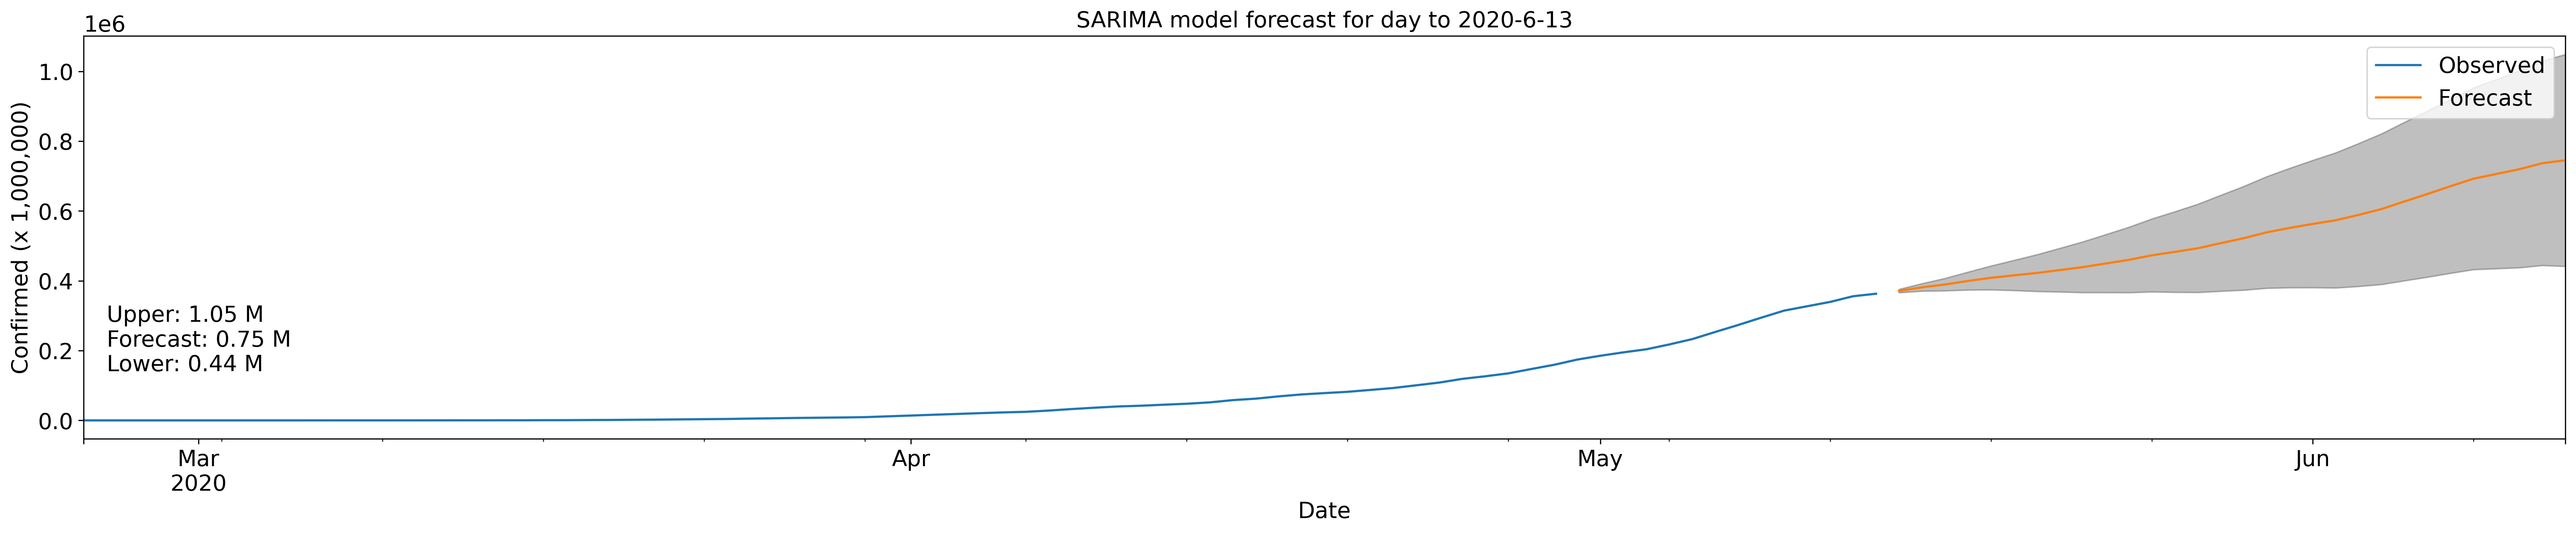

In [65]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(campo + ' (x 1,000,000)')
upper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)
lower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)
plt.text(x='2020-02-26', y=lower-300000, s=
    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+
    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+
    'Lower: ' + str(round(lower/1000000, 2)) + ' M'
)
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')